In [14]:
import numpy as np
import matplotlib.pyplot as plt
from utils import get_formated_region_coords
from astroglial_analysis.classifier2 import *
from astroglial_analysis.sub_segmentation import *
from astroglial_analysis.determine_line import (get_line,uniform_align_comp_cell)
from interpolated_function import *
from astroglial_analysis.create_masks import *

In [15]:
p0 = r"..\..\tests\data\combined_mean_image1_seg.npy"
masks_file = np.load(p0, allow_pickle=True).item()
masks = masks_file['masks']
# plt.figure(figsize=(20, 10))
# plt.imshow(masks)
# plt.gca().invert_yaxis()
# plt.show()

In [16]:

classifications, body, processes, body_and_processes = classify_masks(masks)

upper, lower = body_and_processes['upper'], body_and_processes['lower']
upper_processes, lower_processes = processes['upper'], processes['lower']

ab_list_upper = [(up, get_ab(get_formated_region_coords(np.where(masks == up)))) for up in upper_processes]
ab_list_lower = [(low, get_ab(get_formated_region_coords(np.where(masks == low)))) for low in lower_processes]


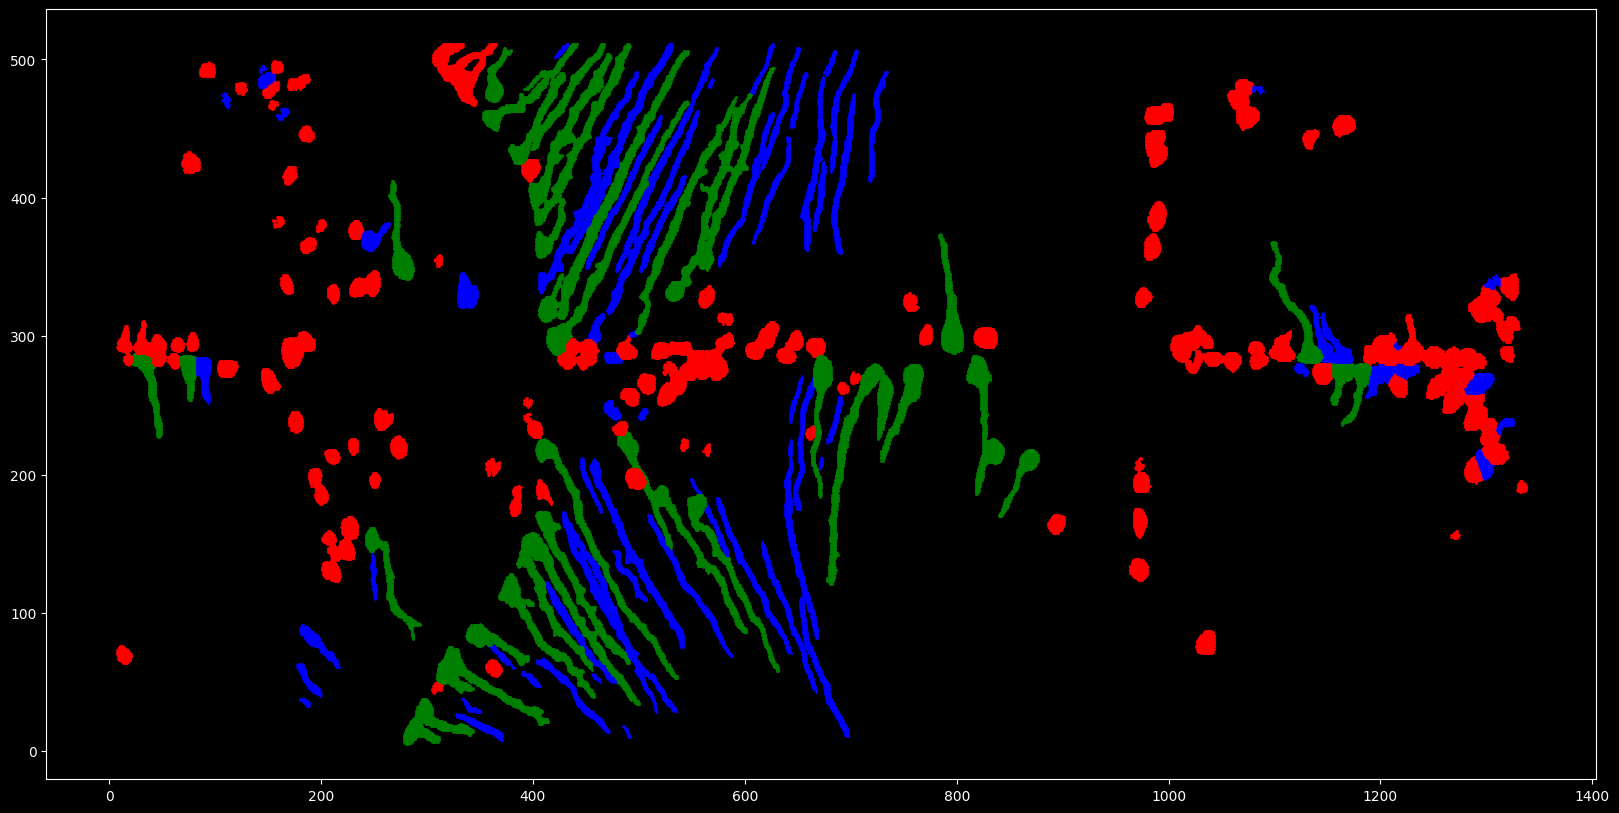

In [17]:
plt.figure(figsize=(20, 10))
visualize_classifications(masks=masks, classifications=classifications)
plt.show()

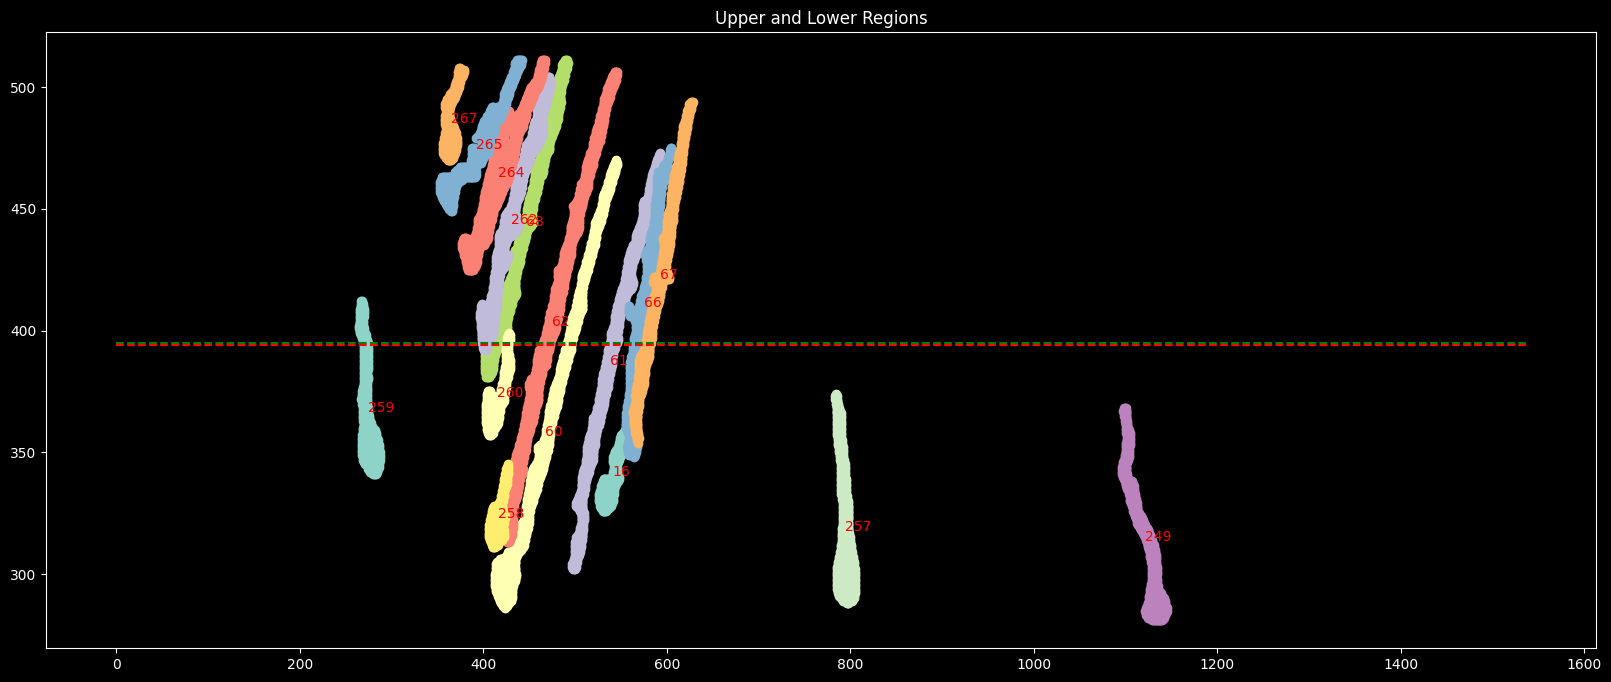

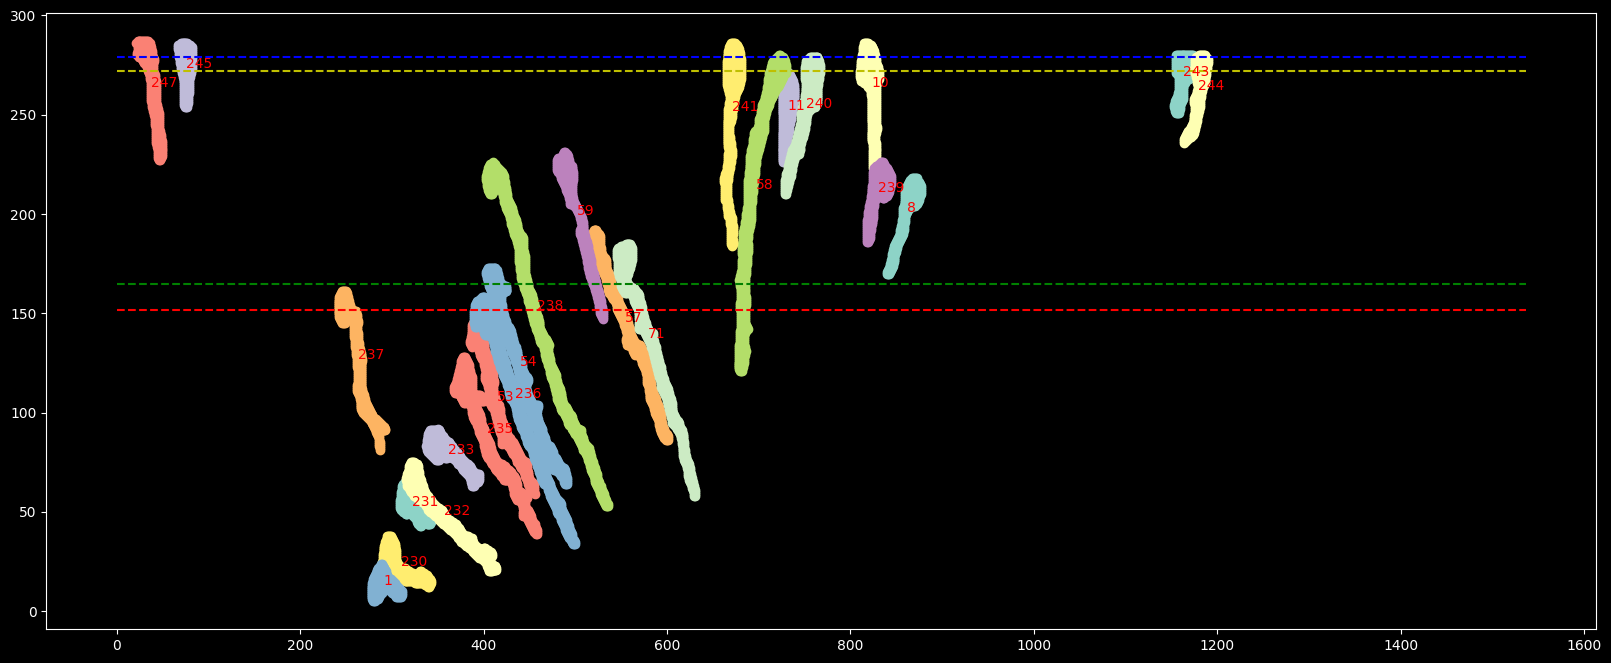

In [18]:
# Plot upper and lower regions

fig, ax = plt.subplots(figsize=(20, 8))

# Plot upper regions
means_upper = []
ax.set_title('Upper and Lower Regions')
for label in upper:
    region = np.where(masks == label)
    region = get_formated_region_coords(region)
    means_upper.append(np.mean(region, axis=0))
    ax.scatter(region[:, 0], region[:, 1])
    plt.text(np.mean(region[:, 0]), np.mean(region[:, 1]), str(label), fontsize=10, color='red')
median_upper = np.median(means_upper, axis=0)
mean_upper = np.mean(means_upper, axis=0)
plt.hlines(mean_upper[1], 0, masks.shape[1], colors='g', linestyles='dashed')
plt.hlines(median_upper[1], 0, masks.shape[1], colors='r', linestyles='dashed')

plt.show()


fig, ax = plt.subplots(figsize=(20, 8))
means_lower = []
# Plot lower regions
for label in lower:
    region = np.where(masks == label)
    region = get_formated_region_coords(region)
    means_lower.append(np.mean(region, axis=0))
    ax.scatter(region[:, 0], region[:, 1])
    plt.text(np.mean(region[:, 0]), np.mean(region[:, 1]), str(label), fontsize=10, color='red')
median_lower = np.median(means_lower, axis=0)
mean_lower = np.mean(means_lower, axis=0)
plt.hlines(median_lower[1], 0, masks.shape[1], colors='r', linestyles='dashed')
plt.hlines(mean_lower[1], 0, masks.shape[1], colors='g', linestyles='dashed')
cut_line = int((mean_upper[1] + mean_lower[1]) / 2)
cut_line_median = int((median_upper[1] + median_lower[1]) / 2)
plt.hlines(cut_line, 0, masks.shape[1], colors='b', linestyles='dashed')
plt.hlines(cut_line_median, 0, masks.shape[1], colors='y', linestyles='dashed')
plt.show()

In [19]:
line_upper, body_upper = get_line(upper, masks, True, 20)
line_lower, body_lower = get_line(lower, masks, False, 20)


upper_points = np.array([point[0] for point in line_upper])
lower_points = np.array([point[0] for point in line_lower])
# top 3 points in upper region which has lowest y values
top3_min_upper = np.array(sorted(upper_points, key=lambda x: x[1])[:3])
# top 3 points in lower region which has highest y values
top3_max_lower = np.array(sorted(lower_points, key=lambda x: x[1], reverse=True)[:3])

average_min_upper = np.mean(top3_max_lower, axis=0)
average_max_lower = np.mean(top3_min_upper, axis=0)

total_min_average = (average_min_upper + average_max_lower) / 2




In [20]:

# from scipy.interpolate import splprep, splev
# from collections import defaultdict



# # Compute cumulative distance for parameter t
# def compute_cumulative_distance(points):
#     distances = np.sqrt(np.diff(points[:, 0])**2 + np.diff(points[:, 1])**2)
#     cumulative_distance = np.insert(np.cumsum(distances), 0, 0)
#     return cumulative_distance / cumulative_distance[-1]  # Normalize to [0,1]

# # t_upper = compute_cumulative_distance(upper_points)
# # t_lower = compute_cumulative_distance(lower_points)

# # Fit splines for parametric curves
# tck_upper, _ = splprep([upper_points[:, 0], upper_points[:, 1]], s=0,k=2)
# tck_lower, _ = splprep([lower_points[:, 0], lower_points[:, 1]], s=0,k=2)

# # Generate fitted points
# num_fit_points = 500
# t_fit_upper = np.linspace(0, 1, num_fit_points)
# t_fit_lower = np.linspace(0, 1, num_fit_points)
# x_fit_upper, y_fit_upper = splev(t_fit_upper, tck_upper)
# x_fit_lower, y_fit_lower = splev(t_fit_lower, tck_lower)

# # Define parametric functions
# def parametric_curve(t, tck):
#     return splev(t, tck)

# # Plotting
# plt.figure(figsize=(20, 10))

# # Plot Upper Body Points
# for i in range(len(line_upper)):
#     plt.scatter(body_upper[i][:, 0], body_upper[i][:, 1], color='lightblue', alpha=0.5)
# plt.scatter(upper_points[:, 0], upper_points[:, 1], color='blue', label='Upper Data Points')

# # Plot Fitted Upper Curve
# plt.plot(x_fit_upper, y_fit_upper, 'b-', label='Upper Spline Fit')

# # Plot Lower Body Points
# for i in range(len(line_lower)):
#     plt.scatter(body_lower[i][:, 0], body_lower[i][:, 1], color='lightcoral', alpha=0.5)
# plt.scatter(lower_points[:, 0], lower_points[:, 1], color='red', label='Lower Data Points')

# # Plot Fitted Lower Curve
# plt.plot(x_fit_lower, y_fit_lower, 'r-', label='Lower Spline Fit')

# plt.legend()
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('Data Points and Fitted Parametric Curves')
# plt.show()

# # Example usage of parametric functions
# t_new = 1  # Midpoint
# x_upper, y_upper = parametric_curve(t_new, tck_upper)
# x_lower, y_lower = parametric_curve(t_new, tck_lower)

# print(f"Upper Curve at t={t_new}: (x, y) = ({x_upper:.2f}, {y_upper:.2f})")
# print(f"Lower Curve at t={t_new}: (x, y) = ({x_lower:.2f}, {y_lower:.2f})")

No intersection found for process 12
No intersection found for process 135
No intersection found for process 171
No intersection found for process 198
No intersection found for process 216
No intersection found for process 219
No intersection found for process 223
No intersection found for process 226
No intersection found for process 228
No intersection found for process 246
No intersection found for process 250
No intersection found for process 3
No intersection found for process 4
No intersection found for process 94
No intersection found for process 107
No intersection found for process 125
No intersection found for process 234
No intersection found for process 242


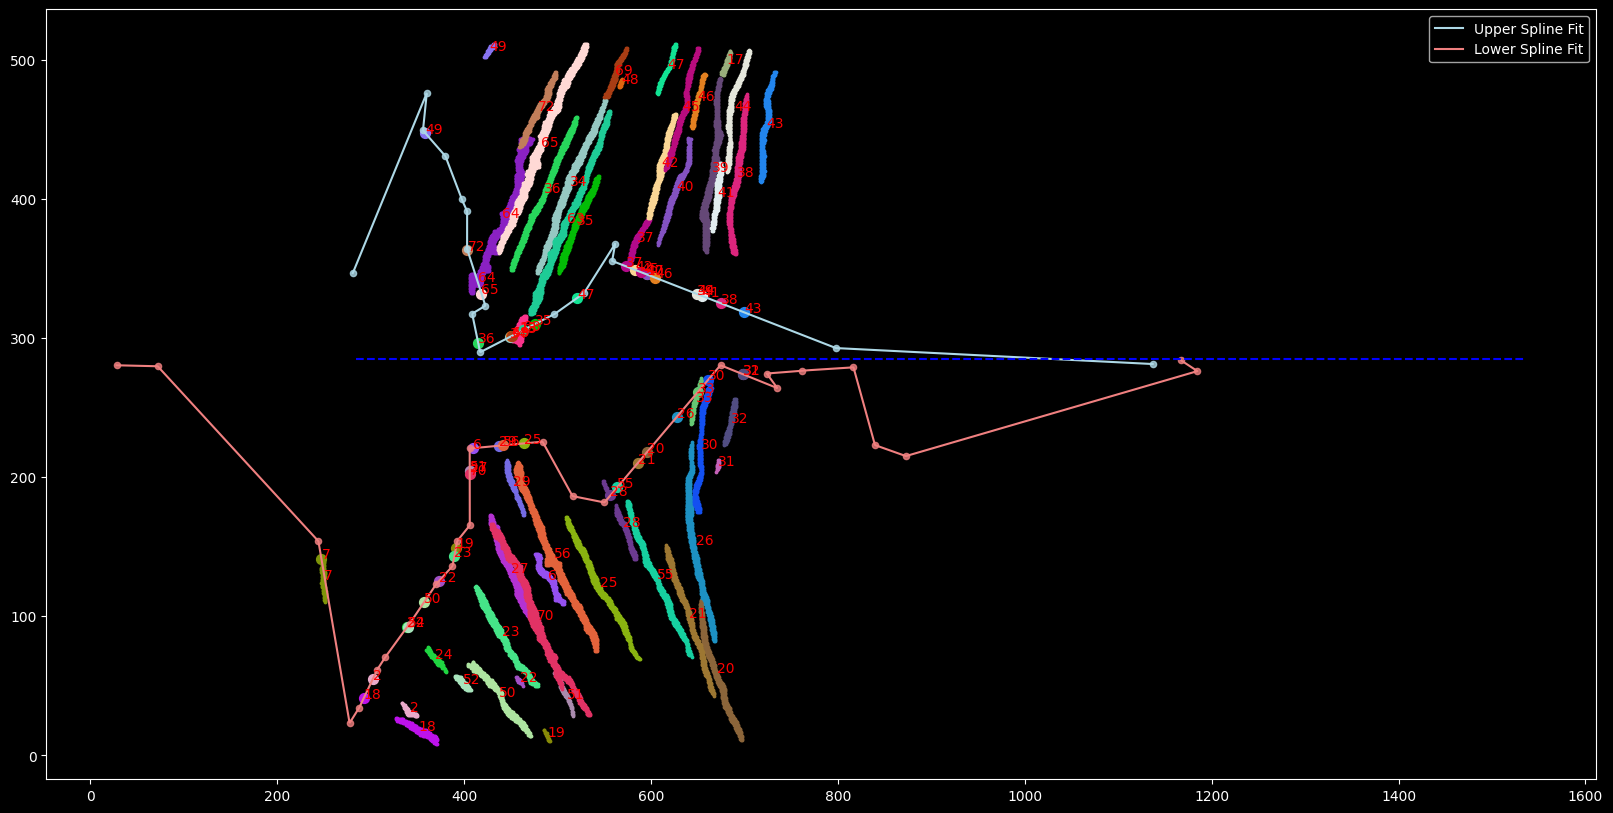

In [21]:
t_upper, tck_upper, x_fit_upper, y_fit_upper, total_length_upper = parametrize_curve(upper_points)
t_lower, tck_lower, x_fit_lower, y_fit_lower, total_length_lower = parametrize_curve(lower_points)

plt.figure(figsize=(20, 10))
processes_upper = processes["upper"]


intersection_list_upper = get_all_intersections(tck_upper,t_upper,ab_list_upper,upper=True)
intersection_list_lower = get_all_intersections(tck_lower,t_lower,ab_list_lower,upper=False)

for label, (t, x, y),d in intersection_list_upper:
    random_color = np.random.rand(3,)
    plt.scatter(x, y, color=random_color, s=50)

    coords = get_formated_region_coords(np.where(masks == label))
    plt.scatter(coords[:, 0], coords[:, 1], color=random_color, s=3)
    plt.text(np.mean(coords[:, 0]), np.mean(coords[:, 1]), str(label), fontsize=10, color='red')
    plt.text(x, y, str(label), fontsize=10, color='red')

for label, (t, x, y),d in intersection_list_lower:
    random_color = np.random.rand(3,)
    plt.scatter(x, y, color=random_color, s=50)
    coords = get_formated_region_coords(np.where(masks == label))
    plt.scatter(coords[:, 0], coords[:, 1], color=random_color, s=3)
    plt.text(np.mean(coords[:, 0]), np.mean(coords[:, 1]), str(label), fontsize=10, color='red')
    plt.text(x, y, str(label), fontsize=10, color='red')
    

plot_parametrized_curve(upper_points, x_fit_upper, y_fit_upper ,color='lightblue', label='Upper Spline Fit')
plot_parametrized_curve(lower_points, x_fit_lower, y_fit_lower, color='lightcoral', label='Lower Spline Fit')
plt.hlines(total_min_average[1],total_min_average[1], masks.shape[1], colors='b', linestyles='dashed')
plt.legend()
plt.show()


In [22]:
aligned_upper,cor_matrix_upper_comp = uniform_align_comp_cell(line_upper, masks, True)
aligned_lower,cor_matrix_lower_comp = uniform_align_comp_cell(line_lower, masks, False)

aligned_process_upper,cor_matrix_upper_p = uniform_align_processes(intersection_list_upper,masks,True)
aligned_process_lower,cor_matrix_lower_p= uniform_align_processes(intersection_list_lower,masks,False)

total_matrix = np.vstack(
    [cor_matrix_upper_comp,cor_matrix_lower_comp,cor_matrix_upper_p,cor_matrix_lower_p]

)


subsegmented_matrix = sub_segment(total_matrix,10)
sub_segmented_labels = np.unique(subsegmented_matrix[:,1])

subsegment_mask = create_cp_mask(subsegmented_matrix,masks)
new_mask_file = np.copy(masks_file)

file_path = r"C:\Users\javid.rezai\YaksiLab\astroglialAnalysis\tests\data\subsegment_mask.npy"

new_mask_file.item()['masks'] = subsegment_mask
np.save(file_path,new_mask_file)



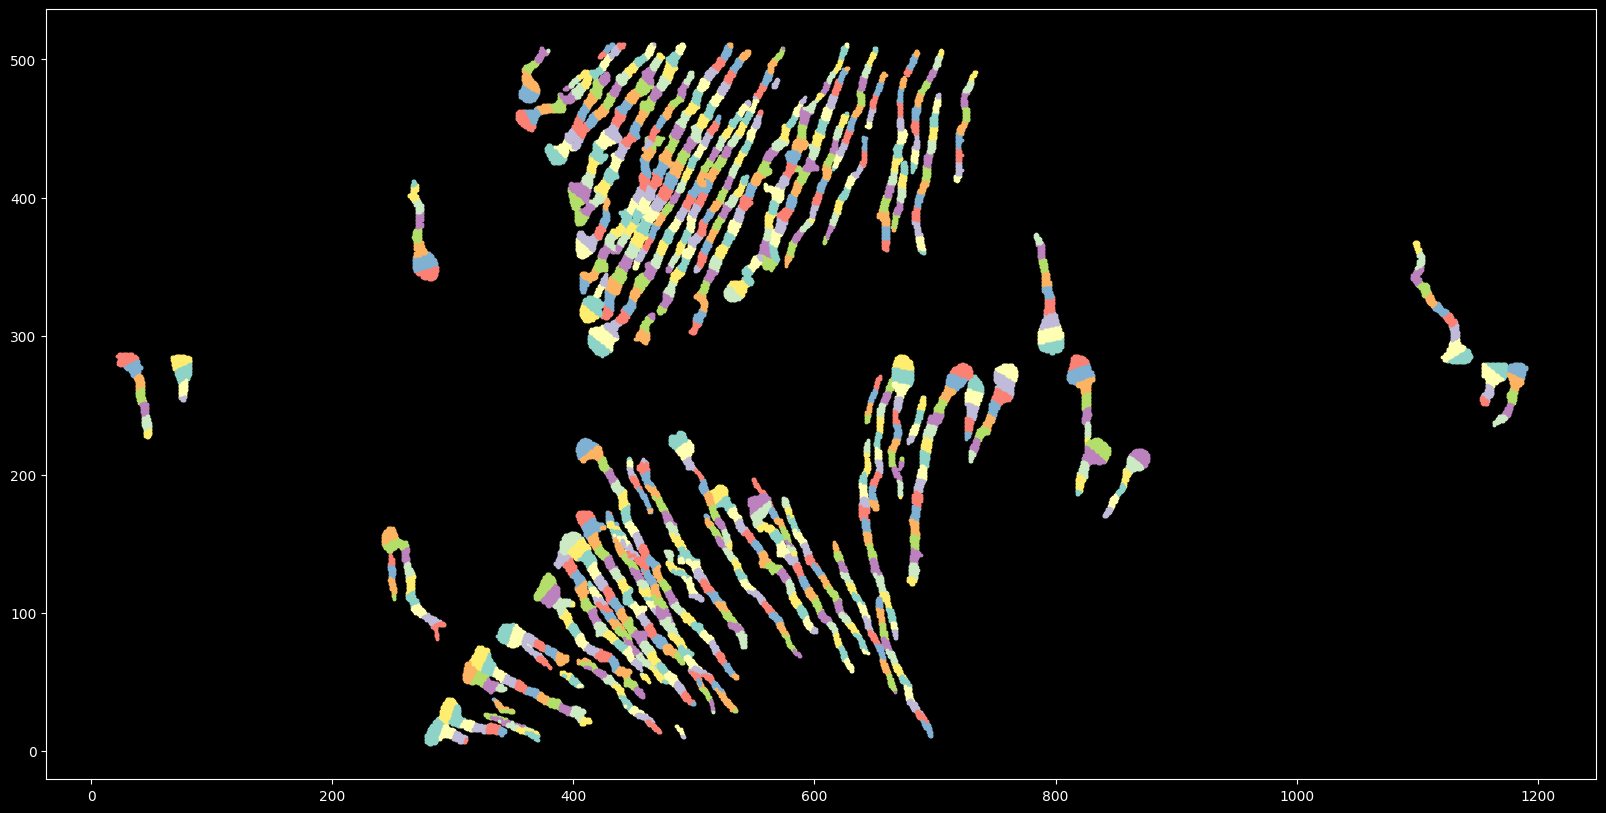

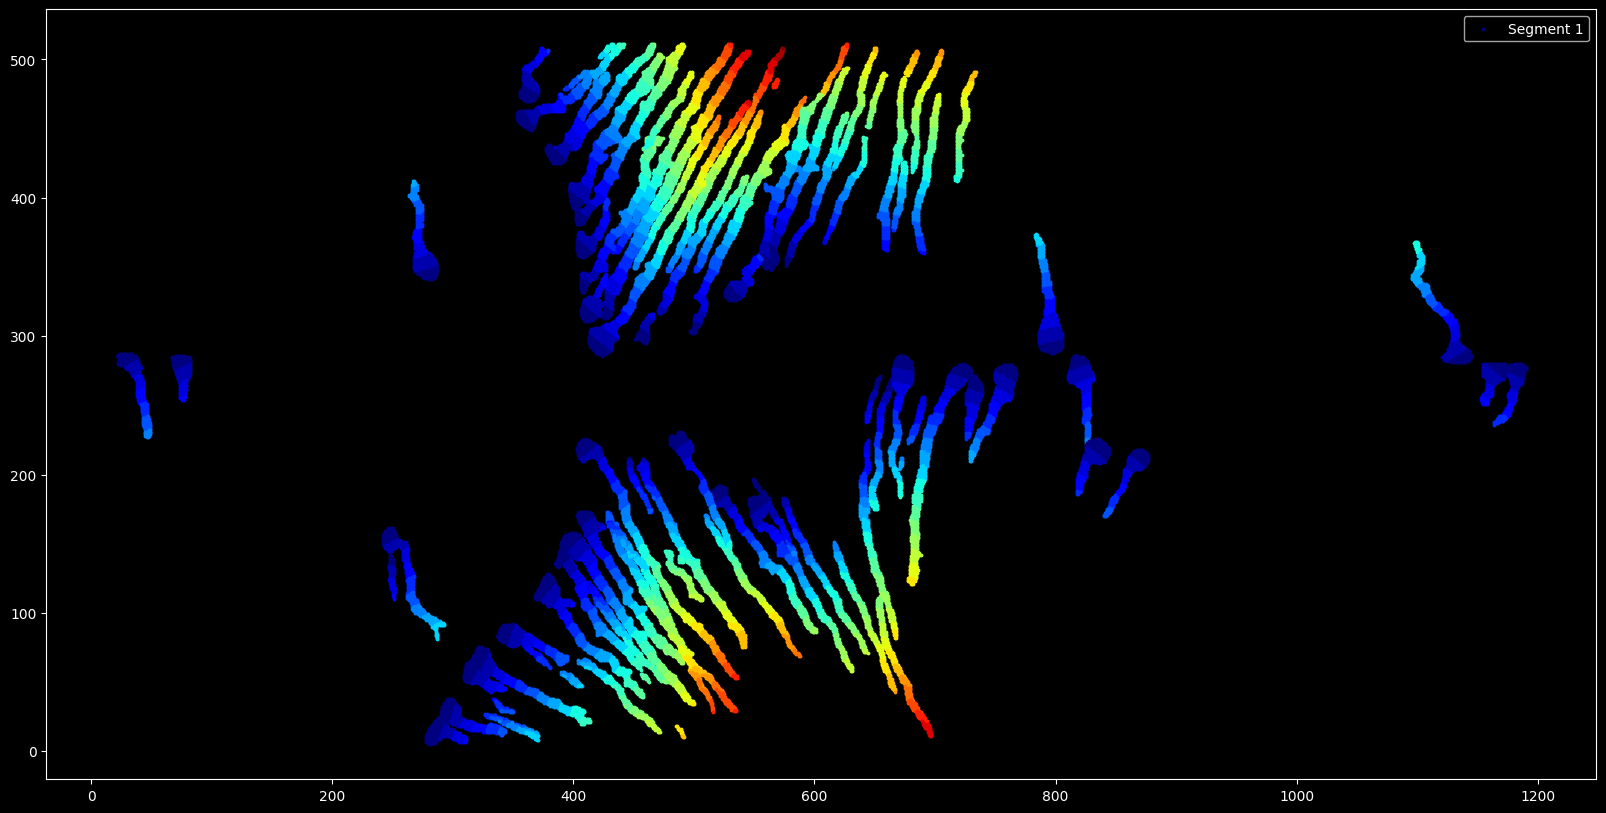

In [23]:
# subsegmented_matrix = [cell label, subsegment label, subsegment number, rotated x,rotated y, original x, original y]
plt.figure(figsize=(20, 10))
for l in sub_segmented_labels:
    label_rows = subsegmented_matrix[subsegmented_matrix[:,1] == l]
    original_coords = np.array([label_rows[:,3],label_rows[:,4]])
    plt.scatter(original_coords[0],original_coords[1],s=3)
plt.show()
# Assign colors based on segment number
unique_segments = np.unique(subsegmented_matrix[:, 2])
colors = plt.cm.jet(np.linspace(0, 1, len(unique_segments)))

plt.figure(figsize=(20, 10))
for l in sub_segmented_labels:
    label_rows = subsegmented_matrix[subsegmented_matrix[:, 1] == l]
    original_coords = np.array([label_rows[:, 3], label_rows[:, 4]])
    segment_number = label_rows[0, 2]
    color = colors[np.where(unique_segments == segment_number)[0][0]]
    plt.scatter(original_coords[0], original_coords[1], s=3, color=color, label=f'Segment {segment_number}' if l == sub_segmented_labels[0] else "")
    

plt.legend()
plt.show()

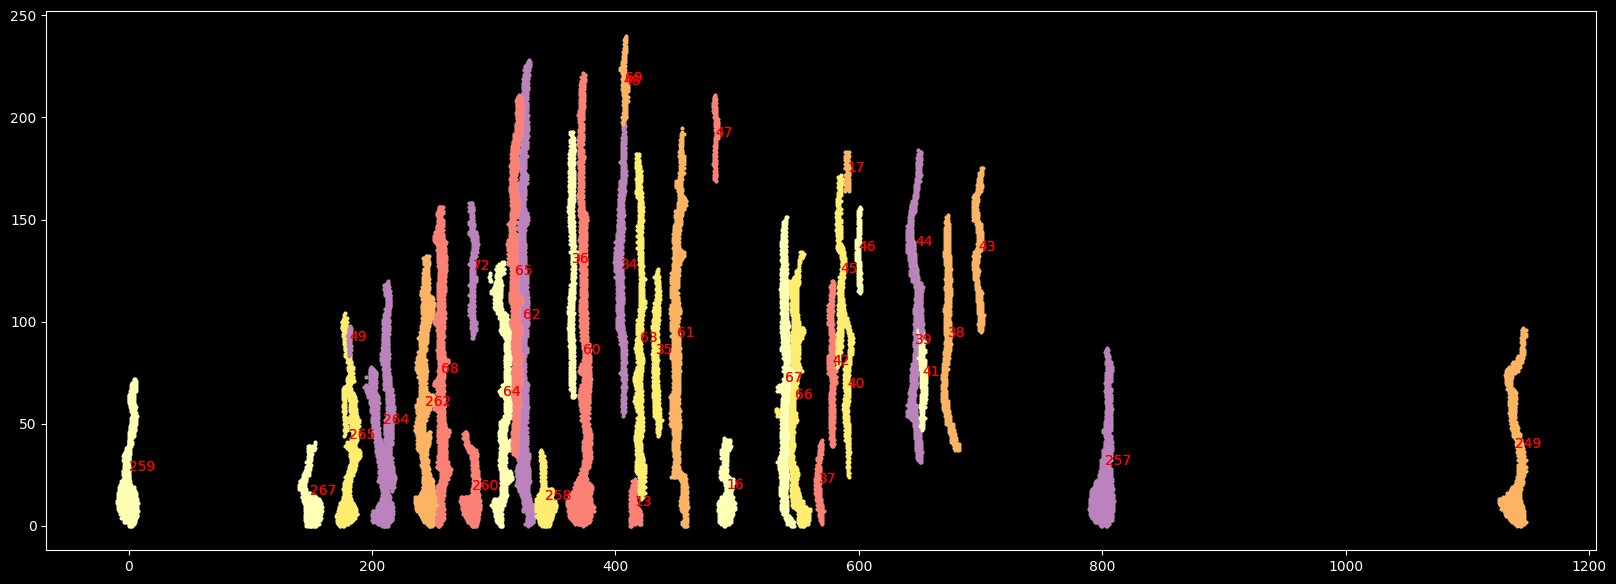

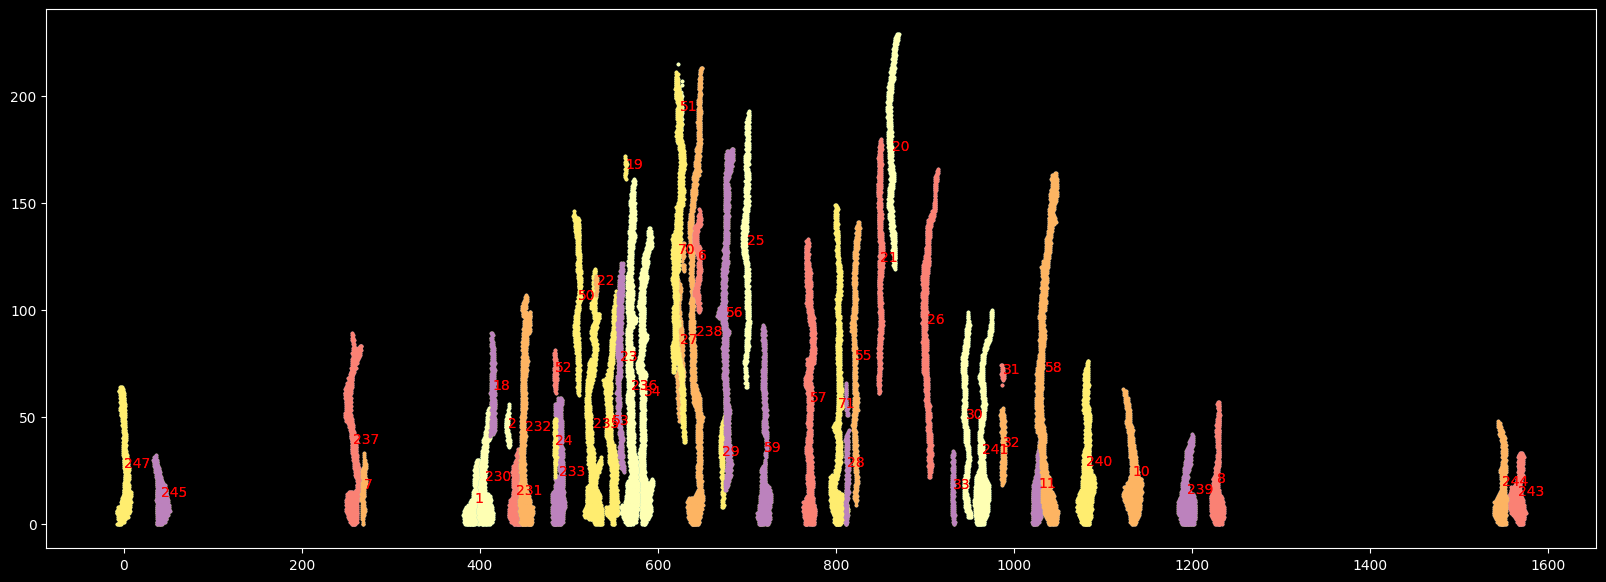

In [24]:

upper_comp_labels = np.unique(cor_matrix_upper_comp[:,0])
lower_comp_labels = np.unique(cor_matrix_lower_comp[:,0])
upper_p_labels = np.unique(cor_matrix_upper_p[:,0])
lower_p_labels = np.unique(cor_matrix_lower_p[:,0])

upper_labels = np.concatenate((upper_comp_labels,upper_p_labels)) 
lower_labels = np.concatenate((lower_comp_labels,lower_p_labels))

plt.figure(figsize=(20, 7))
for l in upper_labels:
    labe_coords = total_matrix[total_matrix[:,0] == l]
    rotated_coords = np.array([labe_coords[:,3],labe_coords[:,4]])
    plt.scatter(rotated_coords[0],rotated_coords[1],s=3)
    plt.text(np.mean(rotated_coords[0]),np.mean(rotated_coords[1]),str(l),fontsize=10,color='red')

    labe_coords = total_matrix[total_matrix[:,0] == l]
    rotated_coords = np.array([labe_coords[:,3],labe_coords[:,4]])
    plt.scatter(rotated_coords[0],rotated_coords[1],s=3)
    plt.text(np.mean(rotated_coords[0]),np.mean(rotated_coords[1]),str(l),fontsize=10,color='red')
plt.show()

plt.figure(figsize=(20, 7))

for l in lower_labels:


    labe_coords = total_matrix[total_matrix[:,0] == l]
    rotated_coords = np.array([labe_coords[:,3],labe_coords[:,4]])
    plt.scatter(rotated_coords[0],rotated_coords[1],s=3)
    plt.text(np.mean(rotated_coords[0]),np.mean(rotated_coords[1]),str(l),fontsize=10,color='red')


    labe_coords = total_matrix[total_matrix[:,0] == l]
    rotated_coords = np.array([labe_coords[:,3],labe_coords[:,4]])
    plt.scatter(rotated_coords[0],rotated_coords[1],s=3)
    plt.text(np.mean(rotated_coords[0]),np.mean(rotated_coords[1]),str(l),fontsize=10,color='red')

plt.show()